In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/sergiuoprea/Hand-Gesture-Recognition-Datasets/master/Original_Dataset.csv

--2022-07-29 03:58:49--  https://raw.githubusercontent.com/sergiuoprea/Hand-Gesture-Recognition-Datasets/master/Original_Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 855368 (835K) [text/plain]
Saving to: ‘Original_Dataset.csv.3’

Original_Dataset.cs 100%[===================>] 835.32K  --.-KB/s    in 0.05s   

2022-07-29 03:58:50 (17.7 MB/s) - ‘Original_Dataset.csv.3’ saved [855368/855368]



## Preparing the Data

In [3]:
data = pd.read_csv("Original_Dataset.csv")
data.head()

,LC_X_1,LC_X_2,LC_X_3,LC_X_4,LC_X_5,LC_X_6,LC_X_7,LC_X_8,LC_X_9,LC_X_10,...,RD_22,RD_23,RD_24,RD_25,RD_26,RD_27,RD_28,RD_29,RD_30,Gesture
0,307,389,259,259,259,259,259,258,258,259,...,1001,1001,1004,1007,1013,1013,1016,1016,1019,ZoomIn
1,340,340,340,340,339,339,340,339,338,338,...,1007,1007,1007,1010,1010,1010,1010,1013,1010,ZoomIn
2,260,263,266,266,270,271,271,271,271,271,...,962,959,0,957,957,959,959,962,962,ZoomIn
3,338,339,338,337,337,337,337,337,336,335,...,1013,1010,1010,1010,1013,1010,1010,1013,1010,ZoomIn
4,319,240,240,318,241,318,318,318,318,318,...,1016,1016,1022,1022,1013,1016,1016,1019,1019,ZoomIn


ZoomIn       50
ZoomOut      50
MoveLeft     50
MoveRight    50
MoveDown     50
MoveUp       50
Press        50
Name: Gesture, dtype: int64


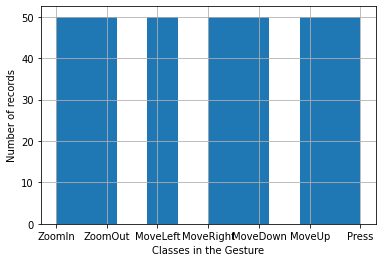

In [4]:
classes = data['Gesture']
print(classes.value_counts())
classes.hist()
plt.xlabel("Classes in the Gesture")
plt.ylabel("Number of records")
plt.show()

In [5]:
data['Gesture'] = data['Gesture'].map({'ZoomIn' :0, 
                                         'ZoomOut':1,
                                         'MoveLeft':2,
                                         'MoveRight': 3, 
                                         'MoveDown': 4, 
                                         'MoveUp': 5,
                                         'Press': 6})

In [6]:
data['Gesture']

0      0
1      0
2      0
3      0
4      0
      ..
345    6
346    6
347    6
348    6
349    6
Name: Gesture, Length: 350, dtype: int64

In [7]:
data.shape

(350, 781)

In [8]:
print(list(data.columns))

['LC_X_1', 'LC_X_2', 'LC_X_3', 'LC_X_4', 'LC_X_5', 'LC_X_6', 'LC_X_7', 'LC_X_8', 'LC_X_9', 'LC_X_10', 'LC_X_11', 'LC_X_12', 'LC_X_13', 'LC_X_14', 'LC_X_15', 'LC_X_16', 'LC_X_17', 'LC_X_18', 'LC_X_19', 'LC_X_20', 'LC_X_21', 'LC_X_22', 'LC_X_23', 'LC_X_24', 'LC_X_25', 'LC_X_26', 'LC_X_27', 'LC_X_28', 'LC_X_29', 'LC_X_30', 'LC_Y_1', 'LC_Y_2', 'LC_Y_3', 'LC_Y_4', 'LC_Y_5', 'LC_Y_6', 'LC_Y_7', 'LC_Y_8', 'LC_Y_9', 'LC_Y_10', 'LC_Y_11', 'LC_Y_12', 'LC_Y_13', 'LC_Y_14', 'LC_Y_15', 'LC_Y_16', 'LC_Y_17', 'LC_Y_18', 'LC_Y_19', 'LC_Y_20', 'LC_Y_21', 'LC_Y_22', 'LC_Y_23', 'LC_Y_24', 'LC_Y_25', 'LC_Y_26', 'LC_Y_27', 'LC_Y_28', 'LC_Y_29', 'LC_Y_30', 'LF_X_1_1', 'LF_X_1_2', 'LF_X_1_3', 'LF_X_1_4', 'LF_X_1_5', 'LF_X_1_6', 'LF_X_1_7', 'LF_X_1_8', 'LF_X_1_9', 'LF_X_1_10', 'LF_X_1_11', 'LF_X_1_12', 'LF_X_1_13', 'LF_X_1_14', 'LF_X_1_15', 'LF_X_1_16', 'LF_X_1_17', 'LF_X_1_18', 'LF_X_1_19', 'LF_X_1_20', 'LF_X_1_21', 'LF_X_1_22', 'LF_X_1_23', 'LF_X_1_24', 'LF_X_1_25', 'LF_X_1_26', 'LF_X_1_27', 'LF_X_1_28', 'L

#### LC means left centroid
#### LF means left finger
#### RF means right finger
#### RC means right centroid

In [9]:
# Only taking Centroid coordinates (X and Y) for Left and Right hands 
# LC X,Y
lc = data.iloc[:,:60].to_numpy()
print(lc.shape)

# RC X,Y
rc = data.iloc[:,390:450].to_numpy()
print(rc.shape)

# reshape
new_LC = lc.reshape(350,30,2)
new_RC = rc.reshape(350,30,2)
print(new_LC.shape)
print(new_RC.shape)

# final data
new_data = np.concatenate((new_LC, new_RC), axis=2)
print(new_data.shape)
#print(new_data)

(350, 60)
(350, 60)
(350, 30, 2)
(350, 30, 2)
(350, 30, 4)


## Normalizing the Data

In [10]:
#Define normalize function
def normalize(data):
    min_data = (data - np.min(data)) 
    max_data = (np.max(data) - np.min(data))
    normalized_data = min_data / max_data
    return normalized_data

In [11]:
#Applying function to dataset
data = normalize(new_data)

## Model Building

In [12]:
pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from hmmlearn.hmm import GaussianHMM

### Preparing training and testing data for each sample

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
len(data[50:100])

50

In [16]:
#test sample 0
m1_train, m1_test = train_test_split( data[:50], test_size=0.20, random_state=42)
#test sample 1
m2_train, m2_test = train_test_split( data[50:100], test_size=0.20, random_state=42)
#test sample 2
m3_train, m3_test = train_test_split( data[100:150], test_size=0.20, random_state=42)
#test sample 3
m4_train, m4_test = train_test_split( data[150:200], test_size=0.20, random_state=42)
#test sample 4
m5_train, m5_test = train_test_split( data[200:250], test_size=0.20, random_state=42)
#test sample 5
m6_train, m6_test = train_test_split( data[250:300], test_size=0.20, random_state=42)
#test sample 6
m7_train, m7_test = train_test_split( data[300:350], test_size=0.20, random_state=42)


### Training the model

In [17]:
# Model 1 training
cls1 = GaussianHMM()
cls1.fit(m1_train.reshape(-1, 4))

GaussianHMM()

In [18]:
# Model 2 training
cls2 = GaussianHMM()
cls2.fit(m2_train.reshape(-1, 4))

GaussianHMM()

In [19]:
# Model 3 training
cls3 = GaussianHMM()
cls3.fit(m3_train.reshape(-1, 4))

GaussianHMM()

In [20]:
# Model 4 training
cls4 = GaussianHMM()
cls4.fit(m4_train.reshape(-1, 4))

GaussianHMM()

In [21]:
# Model 5 training
cls5 = GaussianHMM()
cls5.fit(m5_train.reshape(-1, 4))

GaussianHMM()

In [22]:
# Model 6 training
cls6 = GaussianHMM()
cls6.fit(m6_train.reshape(-1, 4))

GaussianHMM()

In [23]:
# Model 7 training
cls7 = GaussianHMM()
cls7.fit(m7_train.reshape(-1, 4))

GaussianHMM()

In [24]:
# All models dictionary for looping
classifiers = {'Model 1':cls1,'Model 2':cls2, 'Model 3':cls3, 'Model 4':cls4, 'Model 5':cls5, 'Model 6':cls6, 'Model 7':cls7 }

## Evaluating the Test Data

### Merge all data for testing

In [25]:
# merge all test data
all_testing = np.concatenate((m1_test, 
                             m2_test, 
                             m3_test,
                             m4_test,
                             m5_test,
                             m6_test,
                             m7_test))
all_testing.shape

(70, 30, 4)

In [26]:
# calculate maximum likelihood

def test(input, _cls):
    likelihood = [None] * len(_cls.values())
    cls ={}
    n_cls=1
    
    for i, j in enumerate(_cls.values()):
        likelihood[i] = j.score(input)
        cls[n_cls] = j
        n_cls = n_cls + 1
        
    likelihood = [round(k, 4) for k in likelihood]
    return likelihood, cls

In [27]:
n=1
predictions=[]
for i in range(all_testing.shape[0]):
    
    likelihood,mod = test(all_testing[i], classifiers)
    maximum_likelihood =np.argmax(likelihood)
    predictions.append(maximum_likelihood)
    
    n = n + 1
    
    print(likelihood)
    
    print(maximum_likelihood)
    print()

[47.4558, -46.3687, -1324406.8118, -1324395.4743, -1324394.2235, -1324393.473, -1324397.7309]
0

[61.3487, 6.9248, -1170704.5748, -1170676.9641, -1170685.2713, -1170684.3005, -1170693.801]
0

[47.0138, -67.7304, -1380664.7488, -1380658.09, -1380655.8653, -1380643.5807, -1380647.5062]
0

[98.1558, 96.2088, -1188028.1611, -1187979.7587, -1188000.214, -1187999.2802, -1188015.572]
0

[89.4107, 83.4099, -1437780.4318, -1437733.7823, -1437753.7396, -1437749.27, -1437765.331]
0

[96.5861, 119.2816, -1314930.1623, -1314877.2288, -1314898.0827, -1314911.84, -1314928.0753]
1

[92.9787, 63.6454, -1386084.9803, -1386043.9914, -1386061.8844, -1386049.2325, -1386064.3012]
0

[75.173, 2.2566, -1530221.4492, -1530196.0778, -1530205.9559, -1530185.965, -1530196.7384]
0

[54.5207, 48.0442, -1344256.163, -1344218.0947, -1344229.6784, -1344247.1307, -1344258.2035]
0

[81.3982, 57.6575, -1531942.5311, -1531901.9677, -1531919.0744, -1531909.931, -1531924.5063]
0

[74.0067, 101.3857, -1629763.017, -1629710.5

In [28]:
# Defining actual class values for test set
actual_test = [] 
for i in range(7):
  for j in range(10):
    actual_test.append(i)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
acc = accuracy_score(predictions, actual_test )
print("Accuracy is ", acc*100)

Accuracy is  72.85714285714285


# Finding the Best Configuration

## Component 1

In [31]:
#First try of hyperparameter search by training the models using a different number of components

comp1_model1 = GaussianHMM(n_components=12)
comp1_model2 = GaussianHMM(n_components=14)
comp1_model3 = GaussianHMM(n_components=10)
comp1_model4 = GaussianHMM(n_components=17)
comp1_model5 = GaussianHMM(n_components=13)
comp1_model6 = GaussianHMM(n_components=15)
comp1_model7 = GaussianHMM(n_components=19)

In [32]:
# Training the models
comp1_model1.fit(m1_train.reshape(-1,4))
comp1_model2.fit(m2_train.reshape(-1,4))
comp1_model3.fit(m3_train.reshape(-1,4))
comp1_model4.fit(m4_train.reshape(-1,4))
comp1_model5.fit(m5_train.reshape(-1,4))
comp1_model6.fit(m6_train.reshape(-1,4))
comp1_model7.fit(m7_train.reshape(-1,4))

GaussianHMM(n_components=19)

In [33]:
#model dictionary compnent 1
component1 = {'Component 1: Model 1':comp1_model1,'Component 1: Model 2':comp1_model2, 'Component 1: Model 3':comp1_model3, 'Component 1: Model 4':comp1_model4, 'Component 1: Model 5':comp1_model5, 'Component 1: Model 6':comp1_model6, 'Component 1: Model 7':comp1_model7} 

In [34]:
#Testing COmponent 1
n=1
comp1_predictions=[]
for i in range(all_testing.shape[0]):
    
    c1_likelihood, c1_mod = test(all_testing[i], component1)
    c1_maximum_likelihood =np.argmax(c1_likelihood)
    comp1_predictions.append(c1_maximum_likelihood)
    
    n = n + 1
    
    print(c1_likelihood)
    
    print(c1_maximum_likelihood)
    print()

[274.593, -31.1981, -3697.8097, -356.1571, -4327.6263, -1180.711, -544.1229]
0

[250.0323, 34.2282, -3697.8079, -353.2218, -3966.6112, -1060.4932, -543.8681]
0

[-190.252, -58.8631, -3697.8105, -357.0955, -4498.7649, -1203.8506, -544.1851]
1

[128.9609, 163.4373, -3697.8074, -353.119, -3891.3884, -1076.9453, -543.8877]
1

[293.786, 187.7346, -3697.8096, -357.2786, -4318.8661, -1267.7436, -544.2725]
0

[199.6214, 250.8677, -3697.808, -355.2613, -4004.0738, -1204.2261, -544.1221]
1

[318.7042, 186.7964, -3697.8095, -356.4557, -4299.6625, -1211.4806, -544.1726]
0

[249.3161, 62.1709, -3697.8113, -359.1306, -4663.8105, -1310.42, -544.3907]
0

[279.6835, 32.648, -3697.8086, -356.098, -4126.1516, -1232.4765, -544.1866]
0

[274.3765, 175.1816, -3697.8107, -358.9389, -4530.5478, -1333.0848, -544.4127]
0

[178.5681, 238.3239, -3697.8107, -360.519, -4544.8657, -1447.7585, -544.613]
1

[128.6937, 227.7675, -3697.8083, -356.9932, -4057.0591, -1319.5626, -544.3285]
1

[139.7815, 226.3753, -3697.809

In [35]:
#Component 1 accuracy 
comp1_acc = accuracy_score(comp1_predictions, actual_test )
print("Accuracy is ", comp1_acc*100)

Accuracy is  80.0


## Component 2

In [36]:
#Second try of hyperparameter search by training the models using a different number of components

comp2_model1 = GaussianHMM(n_components=2)
comp2_model2 = GaussianHMM(n_components=4)
comp2_model3 = GaussianHMM(n_components=8)
comp2_model4 = GaussianHMM(n_components=6)
comp2_model5 = GaussianHMM(n_components=10)
comp2_model6 = GaussianHMM(n_components=7)
comp2_model7 = GaussianHMM(n_components=5)

In [37]:
# Training the models
comp2_model1.fit(m1_train.reshape(-1,4))
comp2_model2.fit(m2_train.reshape(-1,4))
comp2_model3.fit(m3_train.reshape(-1,4))
comp2_model4.fit(m4_train.reshape(-1,4))
comp2_model5.fit(m5_train.reshape(-1,4))
comp2_model6.fit(m6_train.reshape(-1,4))
comp2_model7.fit(m7_train.reshape(-1,4))

GaussianHMM(n_components=5)

In [38]:
#model dictionary component 2
component2 = {'Component 2: Model 1':comp2_model1,'Component 2: Model 2':comp2_model2, 'Component 2: Model 3':comp2_model3, 'Component 2: Model 4':comp2_model4, 'Component 2: Model 5':comp2_model5, 'Component 2: Model 6':comp2_model6, 'Component 2: Model 7':comp2_model7}

In [39]:
# Testing component 2
n=1
comp2_predictions=[]
for i in range(all_testing.shape[0]):
    
    c2_likelihood,c2_mod = test(all_testing[i], component2)
    c2_maximum_likelihood =np.argmax(c2_likelihood)
    comp2_predictions.append(c2_maximum_likelihood)
    
    n = n + 1
    
    print(c2_likelihood)
    
    print(c2_maximum_likelihood)
    print()

[170.7504, 55.9789, -4861.5621, -11801.0771, -3914.3588, -26835.579, -12005.7235]
0

[127.5191, 12.7021, -4817.4832, -10758.9596, -3725.5829, -24800.1021, -10849.1454]
0

[64.4658, -121.2793, -4861.5626, -12300.2896, -4010.2645, -22397.8961, -10646.566]
0

[113.146, 91.8889, -4861.5605, -10636.0241, -3671.4447, -23763.9784, -10385.4418]
0

[188.3644, 229.789, -4861.5626, -11935.3147, -3891.1987, -27089.4633, -12213.4043]
1

[155.9411, 151.5329, -4861.5615, -11038.94, -3717.1406, -25488.4392, -11133.6219]
0

[195.7139, 187.4689, -4861.5622, -11849.8635, -3890.6741, -26783.2167, -12005.4649]
0

[172.2028, 65.948, -4861.5636, -12875.1963, -4087.246, -29439.5049, -13364.3948]
0

[142.5381, 24.6838, -4627.5257, -11321.435, -3784.8175, -25204.6435, -11434.7714]
0

[176.7855, 198.3013, -4861.5634, -12544.7397, -4004.0937, -28389.7174, -12950.15]
1

[141.0175, 238.6898, -4861.5641, -12650.9806, -3989.7412, -32465.5496, -14457.4197]
1

[129.2659, 177.6241, -4830.0062, -11183.2304, -3725.4191, -

In [40]:
#Component 2 accuracy 
comp2_acc = accuracy_score(comp2_predictions, actual_test )
print("Accuracy is ", comp2_acc*100)

Accuracy is  80.0


## Component 3

In [41]:
#Third try of hyperparameter search by training the models using a different number of components

comp3_model1 = GaussianHMM(n_components=29)
comp3_model2 = GaussianHMM(n_components=21)
comp3_model3 = GaussianHMM(n_components=22)
comp3_model4 = GaussianHMM(n_components=29)
comp3_model5 = GaussianHMM(n_components=27)
comp3_model6 = GaussianHMM(n_components=27)
comp3_model7 = GaussianHMM(n_components=26)

In [42]:
# Training the models
comp3_model1.fit(m1_train.reshape(-1,4))
comp3_model2.fit(m2_train.reshape(-1,4))
comp3_model3.fit(m3_train.reshape(-1,4))
comp3_model4.fit(m4_train.reshape(-1,4))
comp3_model5.fit(m5_train.reshape(-1,4))
comp3_model6.fit(m6_train.reshape(-1,4))
comp3_model7.fit(m7_train.reshape(-1,4))

GaussianHMM(n_components=26)

In [43]:
#model dictionary component 3
component3 = {'Component 3: Model 1':comp3_model1,'Component 3: Model 2':comp3_model2, 'Component 3: Model 3':comp3_model3, 'Component 3: Model 4':comp3_model4, 'Component 3: Model 5':comp3_model5, 'Component 3: Model 6':comp3_model6, 'Component 3: Model 7':comp3_model7}

In [44]:
# Testing Component 3 
n=1
comp3_predictions=[]
for i in range(all_testing.shape[0]):
    
    c3_likelihood,c3_mod = test(all_testing[i], component3)
    c3_maximum_likelihood =np.argmax(c3_likelihood)
    comp3_predictions.append(c3_maximum_likelihood)
    
    n = n + 1
    
    print(c3_likelihood)
    
    print(c3_maximum_likelihood)
    print()

[272.9257, -263.5202, -1482.3434, -416.5682, -969.0575, -1182.9469, -901.3244]
0

[299.3411, -193.9391, -1482.3409, -412.8155, -969.0387, -1123.0473, -877.69]
0

[38.9454, -480.3144, -1482.3441, -417.7917, -969.0613, -1193.587, -932.639]
0

[97.1052, -51.3259, -1482.3409, -412.5879, -969.041, -1146.8952, -921.2651]
0

[339.9526, 146.9713, -1482.3448, -417.9256, -969.0701, -1184.3733, -903.2346]
0

[239.3232, 147.1206, -1482.3432, -415.3016, -969.0598, -1216.7383, -926.352]
0

[347.2933, 148.3831, -1482.3439, -416.9087, -969.0618, -1193.4541, -910.1529]
0

[248.4086, 59.6497, -1482.3461, -420.3629, -969.0775, -1228.6398, -928.5911]
0

[292.5603, -85.7932, -1482.3439, -416.3943, -962.9414, -1130.1136, -870.9021]
0

[337.2831, 154.7729, -1482.3462, -420.064, -969.0803, -1197.8644, -910.41]
0

[172.8653, 273.443, -1482.3481, -421.9981, -969.0971, -1205.9304, -901.0922]
1

[155.4752, 222.0308, -1482.3452, -417.4389, -969.0768, -1172.826, -880.9746]
1

[111.684, 258.3549, -1482.3465, -419.77

In [45]:
#Component 3 accuracy 
comp3_acc = accuracy_score(comp3_predictions, actual_test )
print("Accuracy is ", comp3_acc*100)

Accuracy is  87.14285714285714


# HMM Sampling

#### Model 1

50 training samples for model 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app


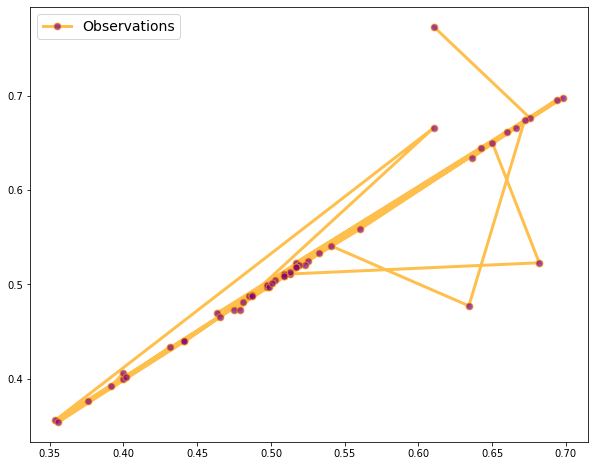

In [46]:
#data[:50][:,0][:50,:1], data[:50][:,0][:50,1:2],


# Plot the actual data used for training the model 1
plt.figure(figsize= (10,8))
plt.plot((data[:50][:,0][:50,:1]),
         (data[:50][:,0][:50,1:2]),
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

50 samples generated by model 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  app.launch_new_instance()


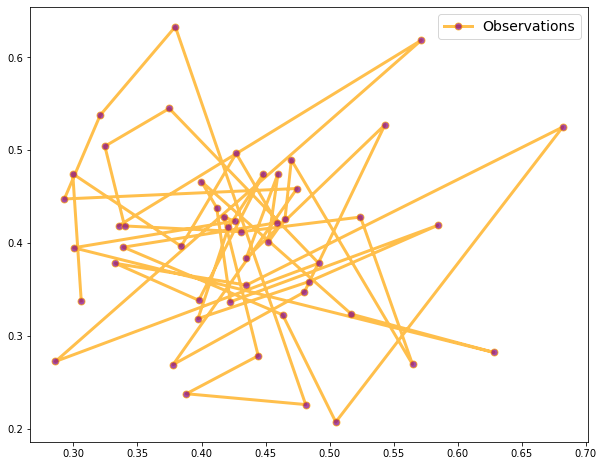

In [47]:
# Ref: https://hmmlearn.readthedocs.io/en/0.2.0/auto_examples/plot_hmm_sampling.html
# Generate samples using the model 1
X1, Z1 = cls1.sample(50)

# Plot the sampled data
plt.figure(figsize= (10,8))
plt.plot(X1[:, 0],
         X1[:, 1],
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

#### Model 2

50 training samples for model 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if sys.path[0] == '':


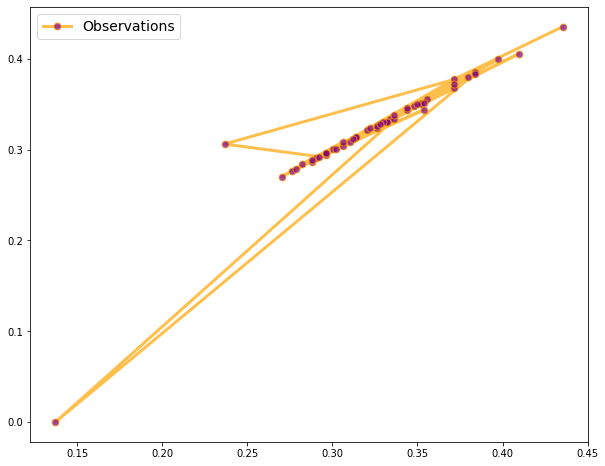

In [48]:
# Plot the actual data used for training the model 2
plt.figure(figsize= (10,8))
plt.plot((data[50:100][:,0][:50,:1]),
         (data[50:100][:,0][:50,1:2]),
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

50 samples generated by model 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app


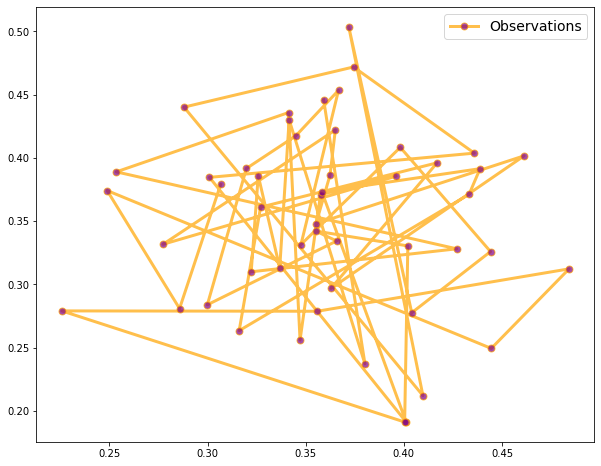

In [49]:
# Generate samples using the model 2
X2, Z2 = cls2.sample(50)

# Plot the sampled data
plt.figure(figsize= (10,8))
plt.plot(X2[:, 0],
         X2[:, 1],
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

#### Model 3

50 training samples for model 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if sys.path[0] == '':


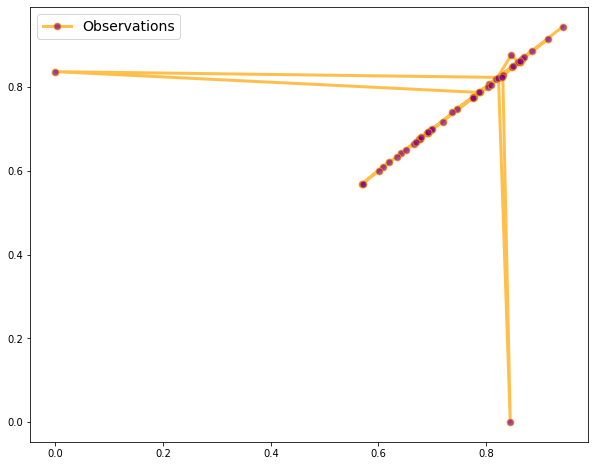

In [50]:
# Plot the actual data used for training the model 3
plt.figure(figsize= (10,8))
plt.plot((data[100:150][:,0][:50,:1]),
         (data[100:150][:,0][:50,1:2]),
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

50 samples generated by model 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app


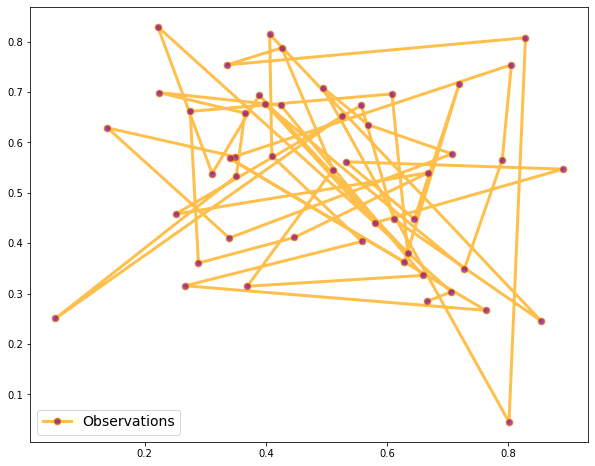

In [51]:
# Generate samples using the model 3
X3, Z3 = cls3.sample(50)

# Plot the sampled data
plt.figure(figsize= (10,8))
plt.plot(X3[:, 0],
         X3[:, 1],
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

#### Model 4

50 training samples for model 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if sys.path[0] == '':


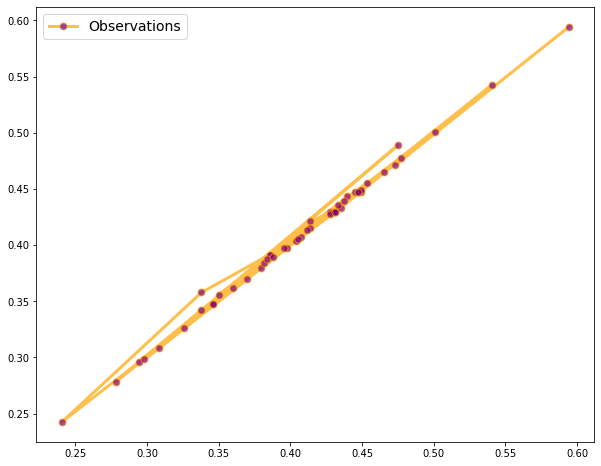

In [52]:
# Plot the actual data used for training the model 4
plt.figure(figsize= (10,8))
plt.plot((data[150:200][:,0][:50,:1]),
         (data[150:200][:,0][:50,1:2]),
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

50 samples generated by model 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app


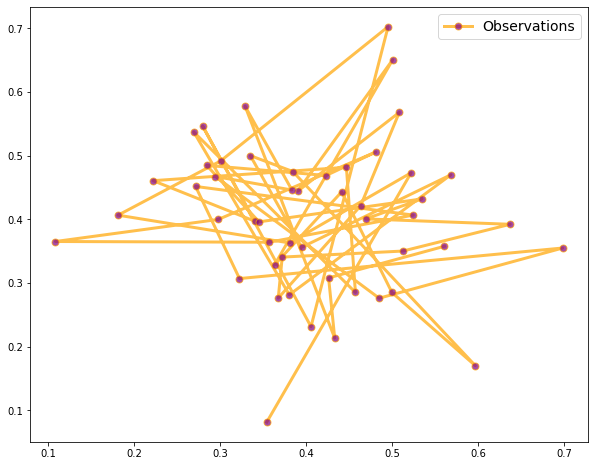

In [53]:
# Generate samples using the model 4
X4, Z4 = cls4.sample(50)

# Plot the sampled data
plt.figure(figsize= (10,8))
plt.plot(X4[:, 0],
         X4[:, 1],
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

#### Model 5

50 training samples for model 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if sys.path[0] == '':


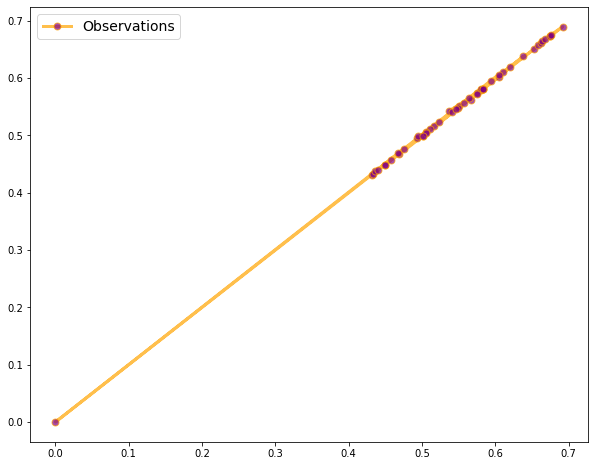

In [54]:
# Plot the actual data used for training the model 5
plt.figure(figsize= (10,8))
plt.plot((data[200:250][:,0][:50,:1]),
         (data[200:250][:,0][:50,1:2]),
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

50 samples generated by model 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app


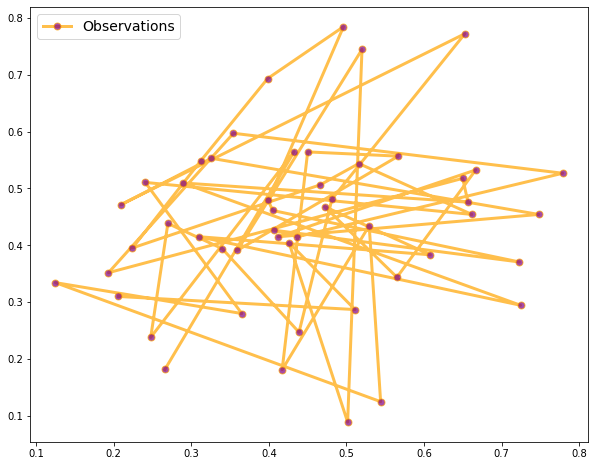

In [55]:
# Generate samples using the model 5
X5, Z5 = cls5.sample(50)

# Plot the sampled data
plt.figure(figsize= (10,8))
plt.plot(X5[:, 0],
         X5[:, 1],
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

#### Model 6

50 training samples for model 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if sys.path[0] == '':


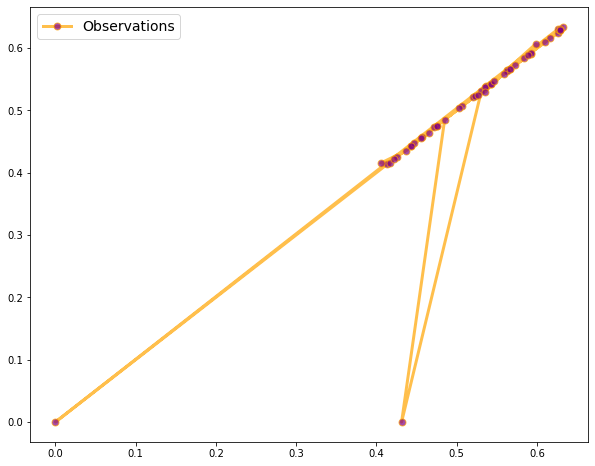

In [56]:
# Plot the actual data used for training the model 6
plt.figure(figsize= (10,8))
plt.plot((data[250:300][:,0][:50,:1]),
         (data[250:300][:,0][:50,1:2]),
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

50 samples generated by model 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app


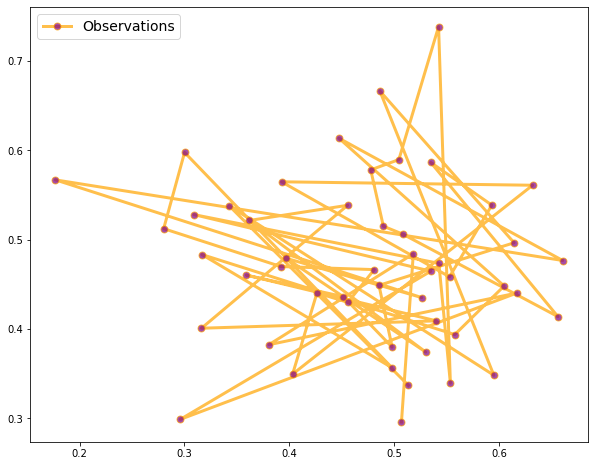

In [57]:
# Generate samples using the model 6
X6, Z6 = cls6.sample(50)

# Plot the sampled data
plt.figure(figsize= (10,8))
plt.plot(X6[:, 0],
         X6[:, 1],
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

#### Model 7

50 training samples for model 7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if sys.path[0] == '':


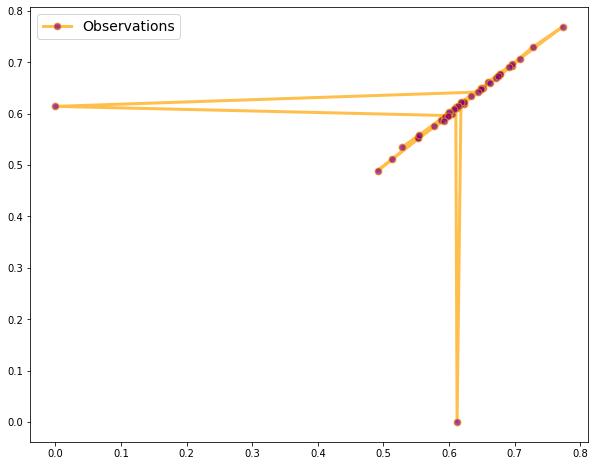

In [58]:
# Plot the actual data used for training the model 7
plt.figure(figsize= (10,8))
plt.plot((data[300:350][:,0][:50,:1]),
         (data[300:350][:,0][:50,1:2]),
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

50 samples generated by model 7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app


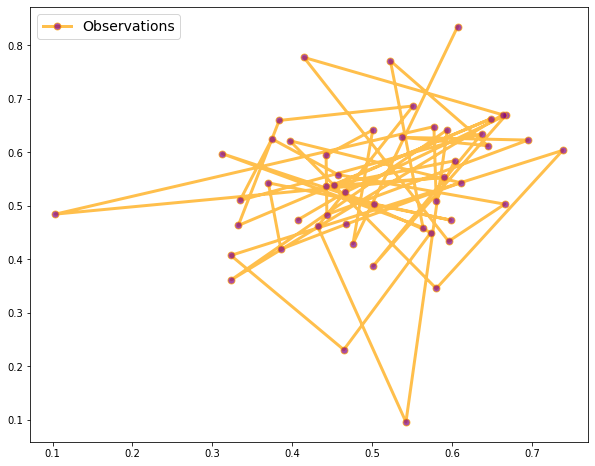

In [59]:
# Generate samples using the model 7
X7, Z7 = cls7.sample(50)

# Plot the sampled data
plt.figure(figsize= (10,8))
plt.plot(X7[:, 0],
         X7[:, 1],
         "o-", 
         label="Observations",
         ms=6,
         color = "orange",
         mfc="purple",
         linewidth= 3,
         alpha=0.7,
         markersize=7)
plt.legend(loc='best', fontsize=14)

plt.show()

## The Forwards Algorithm

In [60]:
class HMM():
  def __init__(self, pi, A, B):
      self.pi_ = pi
      self.A_ = A
      self.B_ = B
      self.n_states_ = A.shape[0]

  def forwards(self, O):
    
    seq_length = O.shape[0]
    forward = np.zeros((self.n_states_, seq_length))

    # Initialization
    for s in range(self.n_states_):
      forward[s, 0] = self.pi_[s] * self.B_[s, O[0]]

    # Recursive step
    for t in range(1, seq_length):
      for s in range(self.n_states_):
        for sp in range(self.n_states_):
          forward[s, t] += forward[sp, t-1] * self.A_[sp, s] * self.B_[s, O[t]]

    #Termination
    forward_prob = np.sum(forward[:,-1])

    print(forward)

    return forward_prob 


In [61]:
pi = np.array([.2, .8])
A = np.array([
              [.5, .5],
              [.4, .6]
])

B = np.array([
              [.5, .4, .1],
              [.2, .4, .4]
])


ALGO = HMM(pi, A, B)
obs = np.array([2, 0, 2])
p = ALGO.forwards(obs)
print(f'Final probability = {p}')

[[0.02     0.069    0.005066]
 [0.32     0.0404   0.023496]]
Final probability = 0.02856200000000001
